<a href="https://colab.research.google.com/github/terryljh/aviation2/blob/main/asrs%20cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/apr2024-dec2025.csv')
df = df.drop(df.columns[0], axis=1)
df = df.reset_index(drop=True)

#testing change to see if edits on collab can be passed to github

#The column headings are not descriptive, and more descriptive column headings are in the zeroth row,
# so we replace the column headings with the entries of the zeroth row, and remove the zeroth row.
new_headers = df.iloc[0]

# Make the headers unique, in case some are repeated, we need to relabel 2,3 etc
def make_unique(headers):
    counts = {}
    unique_headers = []
    for col in headers:
        if col in counts:
            counts[col] += 1
            unique_headers.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            unique_headers.append(col)
    return unique_headers
unique_headers = make_unique(new_headers)

df.columns = unique_headers
df = df.iloc[1:].reset_index(drop=True) #remove unnecessary first row

df['Date']= df['Date'].values
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
#the date column is of type string, we change to integer so we can manipulate it
#errors='coerce' will remove NaN

def months_since_jan_2024(yyyymm):
    year = yyyymm // 100
    month = yyyymm % 100
    # Calculate months since 2024-01
    return (year - 2024) * 12 + (month - 1)
df['Date'] = df['Date'].apply(months_since_jan_2024) #change date yyyymm to months since Jan 2024
df = df[(df['Date'] >= 3) & (df['Date'] <= 24)] #removes anomolous dates, should only be April 2024-May 2025


simpledata = df[['Date']]

pd.set_option('display.max_columns', None)
simpledata['Date'].value_counts()
vc_df = simpledata['Date'].value_counts().reset_index()
vc_df = vc_df.sort_values('Date')
vc_df.columns = ['Months after January 2024', 'Number of accidents in month']
vc_df

,Months after January 2024,Number of accidents in month
2,3,494
0,4,522
1,5,501
4,6,470
3,7,491
9,8,387
5,9,441
8,10,387
6,11,420
7,12,418


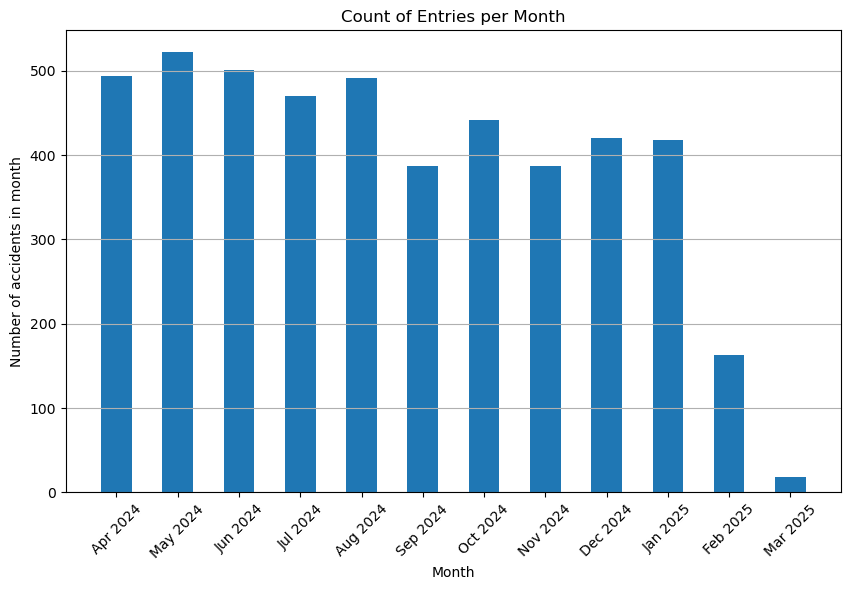

In [ ]:
vc_df['Month_Label'] = vc_df['Months after January 2024'].apply(
    lambda x: pd.to_datetime('2024-01-01') + pd.DateOffset(months=x)
).dt.strftime('%b %Y')
#convert months after Jan 2024 back to actual month for plotting


plt.figure(figsize=(10,6))
plt.bar(vc_df['Month_Label'], vc_df['Number of accidents in month'], width=0.5)
plt.xlabel('Month')
plt.ylabel('Number of accidents in month')
plt.title('Count of Entries per Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()